In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seed for reproducibility
np.random.seed(234)

In [2]:
# Create synthetic dataset

students = 40
study_hours = np.random.randint(1, 10, students)
job_hours = np.random.randint(0, 15, students)
sleep_hours = np.random.randint(4, 9, students)
extracurricular = np.random.randint(0,6, students)


Exam_score = (40
              + 5*study_hours
              + 2*sleep_hours
              - 3*job_hours
              - 1*extracurricular
              + np.random.randint(-5,5,students)

)

data = pd.DataFrame(
    {
        'Study_Hours': study_hours,
        'Job_Hours': job_hours,
        'sleep_Hours': sleep_hours,
        'Extracurricular Hours': sleep_hours,
        'Exam_Score': Exam_score,
        
    }
)

In [3]:
data.head()

,Study_Hours,Job_Hours,sleep_Hours,Extracurricular Hours,Exam_Score
0,9,10,4,4,56
1,5,9,5,5,46
2,2,0,6,6,57
3,4,10,6,6,37
4,8,8,7,7,69


In [4]:
# Lets compute the correlation coefficients for each data feature

corr_coefficients = data.corr()
corr_coefficients

,Study_Hours,Job_Hours,sleep_Hours,Extracurricular Hours,Exam_Score
Study_Hours,1.000000,-0.136551,-0.006383,-0.006383,0.694048
Job_Hours,-0.136551,1.000000,0.188992,0.188992,-0.782525
sleep_Hours,-0.006383,0.188992,1.000000,1.000000,-0.035653
Extracurricular Hours,-0.006383,0.188992,1.000000,1.000000,-0.035653
Exam_Score,0.694048,-0.782525,-0.035653,-0.035653,1.000000


In [5]:
data.columns

Index(['Study_Hours', 'Job_Hours', 'sleep_Hours', 'Extracurricular Hours',
       'Exam_Score'],
      dtype='object')

`lets plot the relationship on a scatter plot`

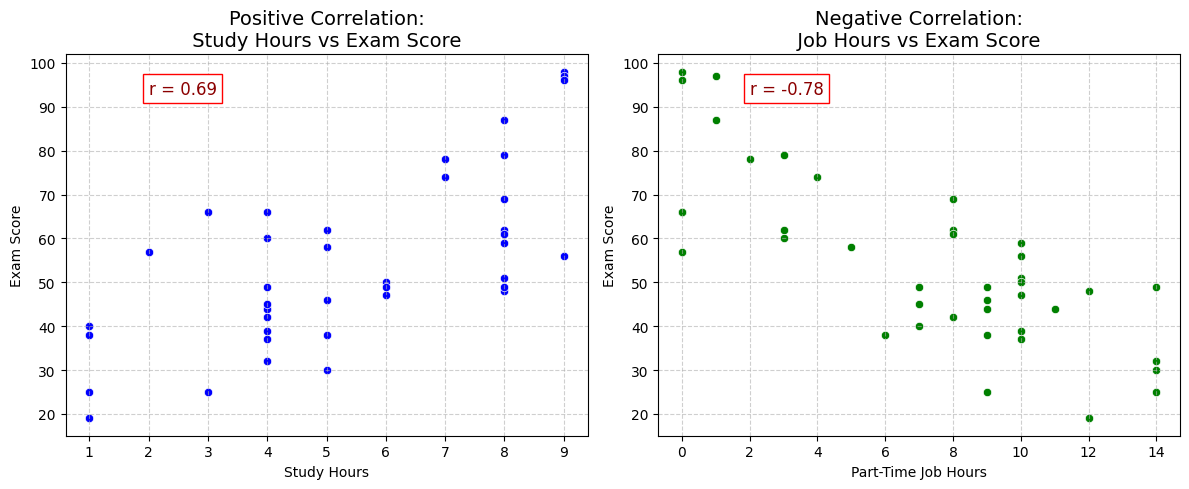

In [6]:
#plot: Positive and Negative examples 
plt.figure(figsize=(12,5))

#Positive correlation: study vs score
plt.subplot(1,2,1)
sns.scatterplot(x='Study_Hours', y = 'Exam_Score', data=data, color='blue')
plt.title("Positive Correlation:\n Study Hours vs Exam Score ", fontsize=14)
plt.xlabel('Study Hours')
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam_Score'])-5, f"r = {data.corr().loc['Study_Hours', 'Exam_Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor="white", edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

#Negative correlation: study vs score
plt.subplot(1,2,2)
sns.scatterplot(x='Job_Hours', y = 'Exam_Score', data=data, color='green')
plt.title("Negative Correlation:\n Job Hours vs Exam Score ", fontsize=14)
plt.xlabel('Part-Time Job Hours')
plt.ylabel("Exam Score")
plt.text(2, max(data['Exam_Score'])-5, f"r = {data.corr().loc['Job_Hours', 'Exam_Score']:.2f}",
         fontsize=12, color="darkred", bbox=dict(facecolor="white", edgecolor='red'))
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## **Regression**

Regression is a statistical method used to 

- Quantify the relationship between a dependent variable (the outcome) and one or more independent variable

- Predict the value of the dependent variable based on the value of the independent variable
    - Mathematically it is represented as 

                `Y = β0 ​+ β1​X + ε`
                
            Where,

            Y - Dependent variable (outcome) | Exam score
            X - Independent variable (predictor) | Study Hours
            β0 - intercept (value of Y when x = 0)
            β1 - Slope or coefficient( how much Y changes when X increases by 1 unit ) 
                in simple terms it measures how much Y canges with X
            ε - Error term

            
            

`Types of Regression`

1. Simple linear regresion (SLR) - One independent variable

   `Y = β0 ​+ β1​X + ε`

2. Multiple linear Regression (MLR) - One or more independent variable

   `Y =β0 ​+ β1​X1 ​+ β2​X2​ + ⋯ + ε`

In [7]:
# We want to see how to se how study hours affect exam scores using SLR

data.head()

,Study_Hours,Job_Hours,sleep_Hours,Extracurricular Hours,Exam_Score
0,9,10,4,4,56
1,5,9,5,5,46
2,2,0,6,6,57
3,4,10,6,6,37
4,8,8,7,7,69


In [8]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# importing the required module
import statsmodels.api as sm

In [10]:
# Define variables for simple regression
X = data['Study_Hours']
Y = data['Exam_Score']


In [11]:
# Add an intercept (constant term)
X = sm.add_constant(X)


In [12]:
X.head()

,const,Study_Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [13]:
# Fit model using OLS (Ordinary least Squares)

model = sm.OLS(Y, X).fit()

In [14]:
# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        12:13:34   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\ncc\AppData\Local\Temp\ipykernel_1480\1175028191.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam_Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


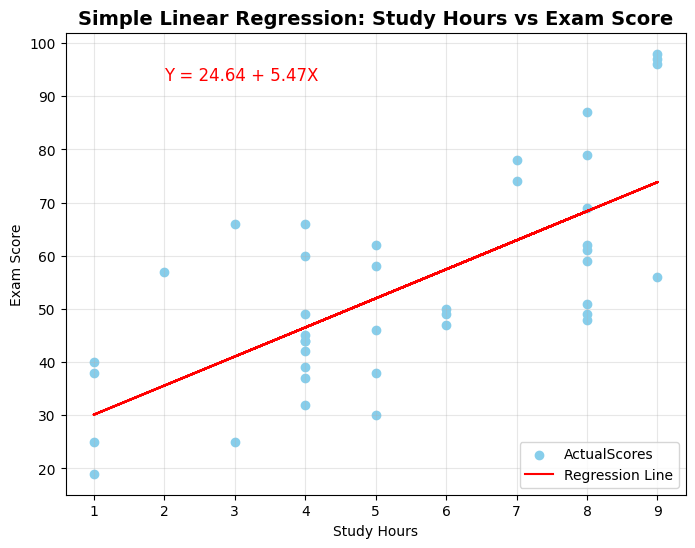

In [15]:
#Lets have the regression plot using the regression line and scatter plot

plt.figure(figsize=(8,6))
plt.scatter(data['Study_Hours'], data['Exam_Score'], color='skyblue', label='ActualScores')
plt.plot(data['Study_Hours'], model.predict(X), color='red', label='Regression Line')

#Annotate
plt.title('Simple Linear Regression: Study Hours vs Exam Score', fontsize = 14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam_Score'])-5, f'Y = {model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

`Lets evaluate Our Model `

In [16]:
predictions = model.predict(X)
predictions

0     73.845272
1     51.976436
2     35.574810
3     46.509227
4     68.378063
5     62.910854
6     46.509227
7     30.107601
8     46.509227
9     46.509227
10    41.042019
11    62.910854
12    73.845272
13    46.509227
14    68.378063
15    57.443645
16    68.378063
17    51.976436
18    30.107601
19    30.107601
20    68.378063
21    57.443645
22    68.378063
23    46.509227
24    46.509227
25    46.509227
26    46.509227
27    51.976436
28    51.976436
29    73.845272
30    57.443645
31    68.378063
32    41.042019
33    68.378063
34    51.976436
35    46.509227
36    73.845272
37    68.378063
38    68.378063
39    30.107601
dtype: float64

In [17]:
data['Predicted Exam Score'] = predictions

data['Squared Error'] = (data['Exam_Score'] - data['Predicted Exam Score'])** 2

# Show a few rows
data[['Study_Hours', 'Exam_Score', 'Predicted Exam Score', 'Squared Error']].head()

,Study_Hours,Exam_Score,Predicted Exam Score,Squared Error
0,9,56,73.845272,318.453719
1,5,46,51.976436,35.717790
2,2,57,35.574810,459.038779
3,4,37,46.509227,90.425406
4,8,69,68.378063,0.386806


In [18]:
# Define Predictors

X = data[['Study_Hours', 'Job_Hours', 'sleep_Hours', 'Extracurricular Hours']]

In [19]:
X.head()

,Study_Hours,Job_Hours,sleep_Hours,Extracurricular Hours
0,9,10,4,4
1,5,9,5,5
2,2,0,6,6
3,4,10,6,6
4,8,8,7,7


In [20]:
X = sm.add_constant(X)

In [21]:
X.head()

,const,Study_Hours,Job_Hours,sleep_Hours,Extracurricular Hours
0,1.0,9,10,4,4
1,1.0,5,9,5,5
2,1.0,2,0,6,6
3,1.0,4,10,6,6
4,1.0,8,8,7,7


In [22]:
# Define dependent variable
y= data['Exam_Score']

In [23]:
y.head()

0    56
1    46
2    57
3    37
4    69
Name: Exam_Score, dtype: int32

In [24]:
#FIT OLS Regression

model = sm.OLS(y,X).fit()

In [25]:
#lets check the estimated coefficients

model.params

const                    43.377252
Study_Hours               4.697097
Job_Hours                -3.206763
sleep_Hours               0.719108
Extracurricular Hours     0.719108
dtype: float64

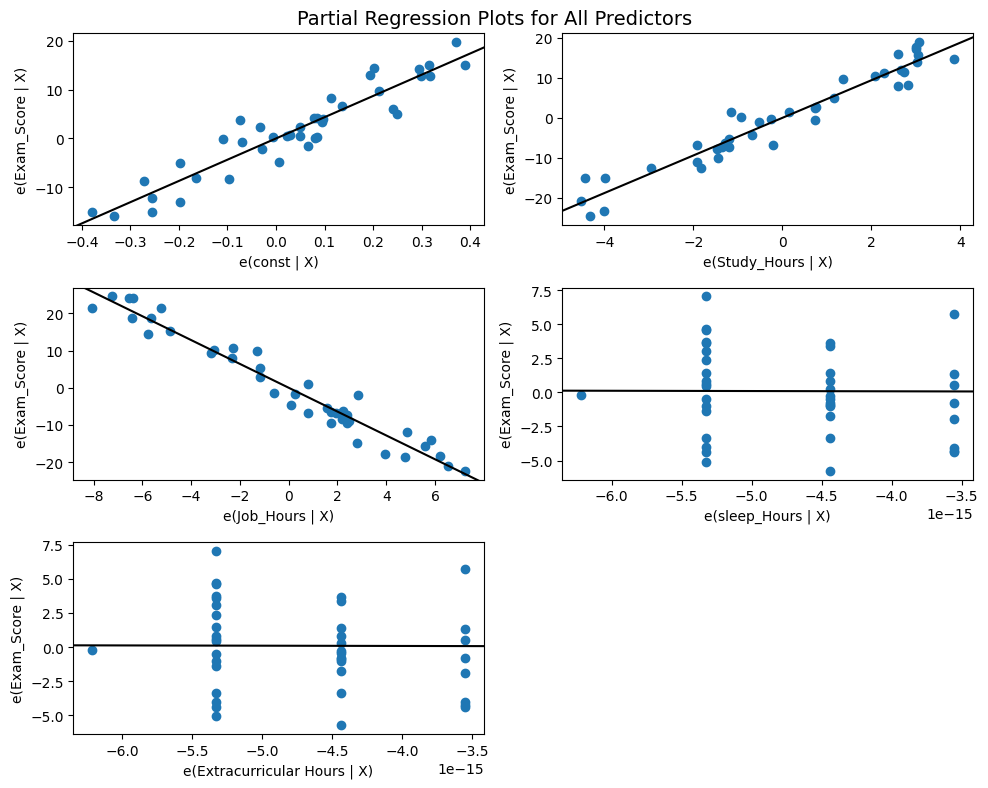

In [26]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.suptitle("Partial Regression Plots for All Predictors", fontsize=14)
plt.show()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     453.0
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.24e-28
Time:                        12:13:34   Log-Likelihood:                -101.99
No. Observations:                  40   AIC:                             212.0
Df Residuals:                      36   BIC:                             218.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    43.37